# Topics
## 1. A Deeper Understanding of Objects in Python
## 2. Relaxation Method


## Everything in Python is an Object...for example:

In [1]:
''' 
a = 2 in python has a very different meaning
from int a = 2 in c.
'''
a = 2
b = int(3)
print a, b
# __...__ : double underscore, or "dunder"
#print dir(a)

2 3


In [2]:
print a.__abs__(), b.__abs__()

2 3


In [3]:
# The default value at instantiation is 0
c = int()
print c

0


In [4]:
# Is it legal? If so, what does this mean? If not, why not? 
gint = int

In [5]:
d = gint(4)
print d, type(d)

4 <type 'int'>


In [6]:
class hint(int): #int is a super class and hint is a subclass
    pass

e = hint(5)
print e, type(e)
print isinstance(e, hint), isinstance(e, int)

5 <class '__main__.hint'>
True True


In [7]:
# Is this ok?
print (-5).__abs__()

#EVERYTHING IN PYTHON IS AN OBJECT

5


## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

In [24]:
import numpy as np

max_iter = 100
#does it converge?
#always converge
#NEEDS TO CHECK CONVERGENCE

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

D = np.diag(A) #diag gives you diagonal
print "The diagonal elements:\n", D
print "The diagonal matrix:\n", np.diagflat(D) #diagflat gives you matrix
R = A - np.diagflat(D)
print "The remainder matrix:\n", R

# initialize the RHS vector
b = np.array([6., 25., -11., 15.])


# prints the linear system
print("System of Linear Equations:")
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print " + ".join(row) + "=" + str(b[i])
print '\n\n'

# Initial Guess: Usually you would want an "educated" guess, 
# typcially x_guess = D^(-1)b. 
# But because the method is so robust, it hardly matters...
# We will try all 0's and a set of random numbers.
#x = np.zeros(b.shape)
x = np.random.rand(b.shape[0]) #needs an integer argument 
# specify tolerance
tol = 1e-4

counter = 0
print 'Starting Jacobi method iterations...'
while counter < max_iter:
    print "Iteration {:d}:{}".format(counter, x)
    # Just to create a numpy array that has the same dimension as x.
    x_new = np.empty(x.shape)

    for i in range(A.shape[0]):
        # np.dot computes dot product
        
        s = np.dot(R[i,], x)
        x_new[i] = (b[i] - s) / A[i, i]
            
    counter += 1      
    # Returns True if two arrays are element-wise equal within a tolerance.
    if np.allclose(x, x_new, rtol=tol):
        print 'Tolerance achieved.  Printing results...'
        break      
    else:
        if counter == max_iter:
            raise Exception('max_iter exceeded!')

    x = x_new

print '\n\n'
print "Solution:", x 
print "Estimated Error:", (np.dot(A, x) - b)/b 

The diagonal elements:
[ 10.  11.  10.   8.]
The diagonal matrix:
[[ 10.   0.   0.   0.]
 [  0.  11.   0.   0.]
 [  0.   0.  10.   0.]
 [  0.   0.   0.   8.]]
The remainder matrix:
[[ 0. -1.  2.  0.]
 [-1.  0. -1.  3.]
 [ 2. -1.  0. -1.]
 [ 0.  3. -1.  0.]]
System of Linear Equations:
10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=6.0
-1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=25.0
2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=-11.0
0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=15.0



Starting Jacobi method iterations...
Iteration 0:[ 0.16668771  0.51701913  0.22909336  0.30828923]
Iteration 1:[ 0.60588324  2.22462849 -1.05080671  1.7097545 ]
Iteration 2:[ 1.03262419  1.765983   -0.82773835  0.90941348]
Iteration 3:[ 0.94214597  2.0433314  -1.03898519  1.10928908]
Iteration 4:[ 1.01213018  1.96139032 -0.97316715  0.97887758]
Iteration 5:[ 0.99077246  2.00930275 -1.00839925  1.01783274]
Iteration 6:[ 1.00261012  1.99353409 -0.99544094  0.99546156]
Iteration 7:[ 0.9984416   2.0018895  -1.00162246  1.0029946 ]
Iteration 8:[

In [22]:
import numpy as np

z = np.empty((5, 2)) #5 by 2 matrix #don't forget parenthesis 
print z
#empty carves out the space for you

print z.shape #gives you dimensions of the matrix in form of tuple

w = np.zeros(z.shape) #shape of w is same shape/dimension as z
print w

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
(5, 2)
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

[ 0.          0.09999645  0.19999358  0.2999916   0.39999061  0.49999061
  0.5999915   0.69999313  0.79999525  0.89999763  1.        ]


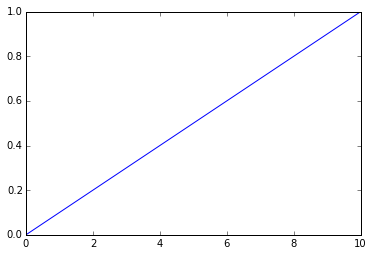

In [26]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    diff = 0. #crucial
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2 #average
        prev_diff = abs(newV - V[i]) 
        V[i] = newV
        if diff < prev_diff:
            diff = prev_diff
            
print V
plt.plot(x, V)
plt.show()
          

[ 0.03751477  0.72057923  0.77664475  0.83802184  0.09986191  0.15492987
  0.73149914  0.76659406  0.3751889   0.29220159  0.95669485]
[ 0.          0.09998705  0.19997657  0.29996933  0.39996571  0.49996571
  0.59996898  0.69997491  0.79998266  0.89999133  1.        ]


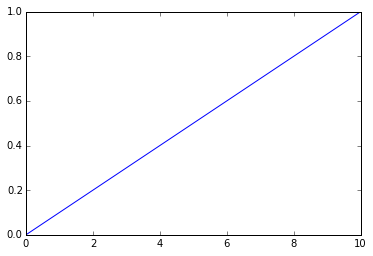

In [27]:
%matplotlib inline
# I can use random numbers to initialize the interior points.

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

NX = 11

#initialization
V = rand(NX)    #yes I can initialize with random numbers!


#V = rand(NX)*1e12    # or even crazily large random numbers!

print V

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
 
  
            
print V
plt.plot(x, V)
plt.show()

# A very robust method!
        

## Breakout Problem:
### For a long rectangular tube (say 10 by 10), the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube. 
### Then plot the result as a surface plot.

## We will see the connection between PDE and linear algebra next week.

## End of week 7-2